### Assignment 7.3 : Hotel Recommendations - Part-1(R)
### Author : Gourav Verma
### DSC630 : Fall-2020

In [1]:
# Import libraries
suppressWarnings(library(ggplot2))
suppressWarnings(library(dplyr))
suppressWarnings(library(tidyr))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [15]:
# Import Data
train <- read.csv('subset_train.csv')
destinations <- read.csv('destinations.csv')

In [16]:
# Clean NA records
train <- na.omit(train)
apply(train, 2, function(x) any(is.na(x)))

date_time                 site_name            posa_continent 
                    FALSE                     FALSE                     FALSE 
    user_location_country      user_location_region        user_location_city 
                    FALSE                     FALSE                     FALSE 
orig_destination_distance                   user_id                 is_mobile 
                    FALSE                     FALSE                     FALSE 
               is_package                   channel                   srch_ci 
                    FALSE                     FALSE                     FALSE 
                  srch_co           srch_adults_cnt         srch_children_cnt 
                    FALSE                     FALSE                     FALSE 
              srch_rm_cnt       srch_destination_id  srch_destination_type_id 
                    FALSE                     FALSE                     FALSE 
               is_booking                       cnt           hotel_continent 
                    FALSE                     FALSE                     FALSE 
            hotel_country              hotel_market             hotel_cluster 
                    FALSE                     FALSE                     FALSE

#### Formating Variables

In [17]:
# Date Time
train$date_time <- as.character(train$date_time) 
train$date_time <- substr(train$date_time,1,nchar(train$date_time)-12)

train <- train %>%
          tidyr::separate(date_time, c("date_year", "date_month"))
train$date_year <- as.integer(train$date_year) 
train$date_month <- as.integer(train$date_month)

In [18]:
# Check in date
train$srch_ci <- as.character(train$srch_ci) 
train$srch_ci <- substr(train$srch_ci,1,nchar(train$srch_ci)-3)
suppressWarnings(train <- train %>%
          tidyr::separate(srch_ci, c("CheckIn_year", "CheckIn_month")))
train$CheckIn_year <- as.integer(train$CheckIn_year) 
train$CheckIn_month <- as.integer(train$CheckIn_month)


In [19]:
# check out date
train$srch_co <- as.character(train$srch_co) 
train$srch_co <- substr(train$srch_co,1,nchar(train$srch_co)-3)
suppressWarnings(train <- train %>%
          tidyr::separate(srch_co, c("CheckOut_year", "CheckOut_month")))
train$CheckOut_year <- as.integer(train$CheckOut_year) 
train$CheckOut_month <- as.integer(train$CheckOut_month)

In [20]:
# Orig_distance_distance
train$orig_destination_distance <- as.integer(train$orig_destination_distance)

### EDA

In [21]:
train <- na.omit(train)
hotel_clusters <- train$hotel_cluster

In [22]:
str(train)

'data.frame':	64169 obs. of  27 variables:
 $ date_year                : int  2013 2014 2014 2014 2014 2014 2013 2013 2014 2013 ...
 $ date_month               : int  11 10 10 3 10 3 5 5 5 11 ...
 $ site_name                : int  13 2 11 2 2 2 2 2 2 2 ...
 $ posa_continent           : int  1 3 3 3 3 3 3 3 3 3 ...
 $ user_location_country    : int  46 66 205 66 66 66 66 66 66 66 ...
 $ user_location_region     : int  171 348 354 311 153 356 363 258 348 254 ...
 $ user_location_city       : int  15334 48862 25315 31592 50542 33823 11295 4687 332 905 ...
 $ orig_destination_distance: int  860 307 1932 1714 1745 1012 251 712 142 1276 ...
 $ user_id                  : int  4539 6304 6450 7030 15632 18795 18841 21932 23232 36114 ...
 $ is_mobile                : int  0 0 0 0 1 0 0 0 0 0 ...
 $ is_package               : int  0 0 0 1 1 1 0 0 0 0 ...
 $ channel                  : int  9 3 5 0 2 1 9 9 9 4 ...
 $ CheckIn_year             : int  2013 2014 2015 2014 2014 2014 2013 2013 2014 2013 

In [12]:
summary(train)

   date_year     date_month    site_name   posa_continent user_location_country
 Min.   : NA   Min.   : NA   Min.   : NA   Min.   : NA    Min.   : NA          
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA   1st Qu.: NA    1st Qu.: NA          
 Median : NA   Median : NA   Median : NA   Median : NA    Median : NA          
 Mean   :NaN   Mean   :NaN   Mean   :NaN   Mean   :NaN    Mean   :NaN          
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA    3rd Qu.: NA          
 Max.   : NA   Max.   : NA   Max.   : NA   Max.   : NA    Max.   : NA          
 user_location_region user_location_city orig_destination_distance
 Min.   : NA          Min.   : NA        Min.   : NA              
 1st Qu.: NA          1st Qu.: NA        1st Qu.: NA              
 Median : NA          Median : NA        Median : NA              
 Mean   :NaN          Mean   :NaN        Mean   :NaN              
 3rd Qu.: NA          3rd Qu.: NA        3rd Qu.: NA              
 Max.   : NA          Max.   : NA     

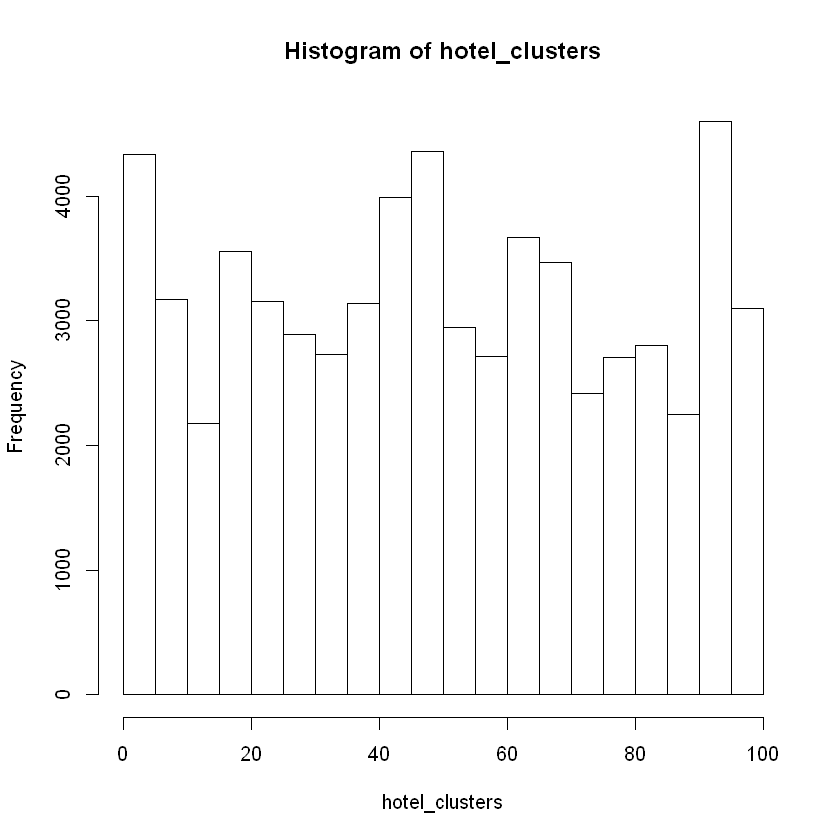

In [23]:
hist(hotel_clusters)

In [24]:
cor_test <- cor(train$hotel_cluster, train)
round(cor_test, 2)

date_year,date_month,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,-0.02,0,-0.02,0,-0.01,0.01,0,0.02,...,0.02,-0.01,-0.01,-0.03,-0.02,0,0,-0.02,0.02,1


In [25]:
# Merge the data sets into one ('train' and 'destinations')
merged_hotel <- left_join(train, destinations, 
                          by = c("srch_destination_id" = "srch_destination_id"))
merged_hotel <- na.omit(merged_hotel)

In [26]:
head(merged_hotel)

,date_year,date_month,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013,11,13,1,46,171,15334,860,4539,0,...,-2.248868,-2.248860,-2.248868,-2.248868,-2.248868,-2.248868,-2.248868,-2.248868,-2.248868,-2.248868
2,2014,10,2,3,66,348,48862,307,6304,0,...,-2.324091,-1.033870,-2.067160,-2.329195,-2.330481,-2.325361,-2.170019,-2.329680,-2.330481,-2.320629
3,2014,10,11,3,205,354,25315,1932,6450,0,...,-2.255405,-2.092796,-2.264705,-2.233834,-2.176576,-2.255405,-2.264705,-2.264705,-2.241351,-2.225888
4,2014,3,2,3,66,311,31592,1714,7030,0,...,-2.316944,-2.367790,-2.326313,-2.346321,-2.375115,-2.302345,-2.371526,-2.350070,-2.354576,-2.374588
5,2014,10,2,3,66,153,50542,1745,15632,1,...,-2.274066,-2.239870,-2.273973,-2.288024,-2.284417,-2.259007,-2.299027,-2.281004,-2.290302,-2.299609
6,2014,3,2,3,66,356,33823,1012,18795,0,...,-2.250440,-2.227043,-2.156036,-2.258465,-2.244187,-2.256733,-2.258193,-2.255866,-2.257384,-2.235050


In [27]:
str(merged_hotel)

'data.frame':	63874 obs. of  176 variables:
 $ date_year                : int  2013 2014 2014 2014 2014 2014 2013 2013 2014 2013 ...
 $ date_month               : int  11 10 10 3 10 3 5 5 5 11 ...
 $ site_name                : int  13 2 11 2 2 2 2 2 2 2 ...
 $ posa_continent           : int  1 3 3 3 3 3 3 3 3 3 ...
 $ user_location_country    : int  46 66 205 66 66 66 66 66 66 66 ...
 $ user_location_region     : int  171 348 354 311 153 356 363 258 348 254 ...
 $ user_location_city       : int  15334 48862 25315 31592 50542 33823 11295 4687 332 905 ...
 $ orig_destination_distance: int  860 307 1932 1714 1745 1012 251 712 142 1276 ...
 $ user_id                  : int  4539 6304 6450 7030 15632 18795 18841 21932 23232 36114 ...
 $ is_mobile                : int  0 0 0 0 1 0 0 0 0 0 ...
 $ is_package               : int  0 0 0 1 1 1 0 0 0 0 ...
 $ channel                  : int  9 3 5 0 2 1 9 9 9 4 ...
 $ CheckIn_year             : int  2013 2014 2015 2014 2014 2014 2013 2013 2014 2013

In [28]:
# Export to CSV
write.csv(merged_hotel,"C:\\Users\\goura\\Desktop\\GARV ML\\DSC 630\\Merged_Prepared_Train.csv")

### Further refer Hotel_Recommendation_Python file